In [45]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
compras_df = pd.read_csv('/content/drive/MyDrive/pagos_provedores_monterrey/data/clean_compras.csv')
compras_df.head(5)

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEETS
0,110036,"SEMEX,S.A.DE C.V.",SEM680801193,48298-183011-4972,SDU-019-2022,ESTIMACION # 18 PARA EL SUMINISTRO Y APLICACIO...,TR,1029007.0,2023-12-19,3914510.69,GTOS VARIOS
1,111017,PRAXAIR MEXICO S. DE R.L. DE C.V.,PME960701GG0,FZ5592100-183011-5005,SFA-057-2022,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1029028.0,2023-12-19,12474.70,GTOS VARIOS
2,112917,"TELEFONOS DE MEXICO,S.A.B DE C.V.",TME840315KT6,0V03217-011-183011-6490,NO APLICA,SERVICIO TELEFONICO DE LA DELEGACION IMPUESTO ...,TR,1028981.0,2023-12-15,1282.82,GTOS VARIOS
3,112917,"TELEFONOS DE MEXICO,S.A.B DE C.V.",TME840315KT6,0F03598-11-183011-6491,NO APLICA,SERVICIO TELEFONICO DEL DIF. CANOAS Y SEGURIDA...,TR,1029062.0,2023-12-21,2723.97,GTOS VARIOS
4,113290,"CREACIONES EXCLUSIVAS CARYFAM, S.A. DE C.V.",CEC930204HH5,9866-183011-6441,ORDEN DE COMPRA 10540,COMPRA DE PLAYERAS PARA ARBITROS Y COMITE ORGA...,TR,1029036.0,2023-12-19,203580.00,GTOS VARIOS


## Vision general del dataset

In [22]:
compras_df.columns

Index(['C B', 'BENEFICIARIO', 'RFC', 'FACTURAS', 'CONTRATO', 'CONCEPTO',
       'TIPO', 'FDO-#OP', 'FECHA', 'IMPORTE', 'SHEETS'],
      dtype='object')

In [23]:
compras_df.dtypes

,0
C B,int64
BENEFICIARIO,object
RFC,object
FACTURAS,object
CONTRATO,object
CONCEPTO,object
TIPO,object
FDO-#OP,float64
FECHA,object
IMPORTE,float64


In [24]:
compras_df.describe()

,C B,FDO-#OP,IMPORTE
count,2662.000000,2.662000e+03,2.662000e+03
mean,235206.332457,1.875413e+08,5.045489e+05
std,91968.772439,1.754166e+08,3.468079e+06
min,110036.000000,1.028752e+06,5.660000e+00
25%,123140.000000,1.028987e+06,4.084680e+03
50%,311250.000000,3.300012e+08,2.432409e+04
75%,320086.000000,3.540001e+08,1.374901e+05
max,656899.000000,6.040001e+08,1.013855e+08


In [25]:
compras_df = compras_df[['BENEFICIARIO', 'FACTURAS', 'CONTRATO','CONCEPTO','TIPO','FDO-#OP','FECHA','IMPORTE','SHEETS']]

### Analisis unidimensional de las variables

In [26]:
compras_df['SHEETS'].value_counts()

,count
SHEETS,
OBRA PUBLICA Y GV FDOS. ESP,1527
GTOS VARIOS,560
COMUNIC,373
SERV PERS,127
SER PROF,75


In [27]:
len(compras_df['CONCEPTO'].unique())

2515

In [28]:
compras_df['BENEFICIARIO'].value_counts()

,count
BENEFICIARIO,
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION,536
MUNICIPIO DE LA CIUDAD DE MONTERREY,55
"EDITORA EL SOL, S.A. DE C.V.",50
"MOTO SOLUCIONES MEXICO, S.A. DE C.V.",50
"CAR ONE MONTERREY, S.A. DE C.V.",44
...,...
INFORMACIÓN RESERVADA DE CONFORMIDAD CON ACUERDO DE INFORMACIÓN CLASIFICADA COMO RESERVADA POR LA CONTRALORÍA MUNICIPAL,1
CRUZ AMADO IVAN,1
"MANAGEMENT TECHNOLOGY INNOVATIONS, S.C.",1


<Axes: >

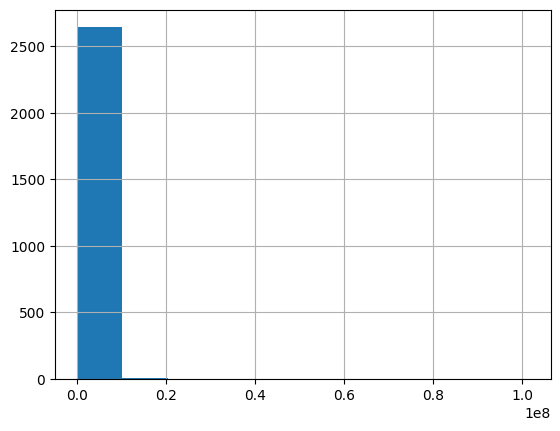

In [30]:
compras_df['IMPORTE'].hist()

<Axes: >

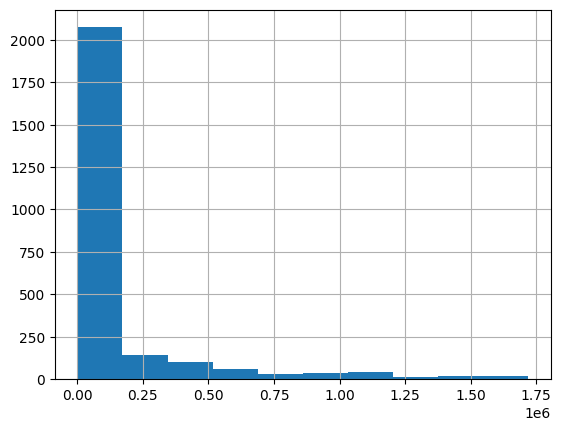

In [32]:
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

<Axes: >

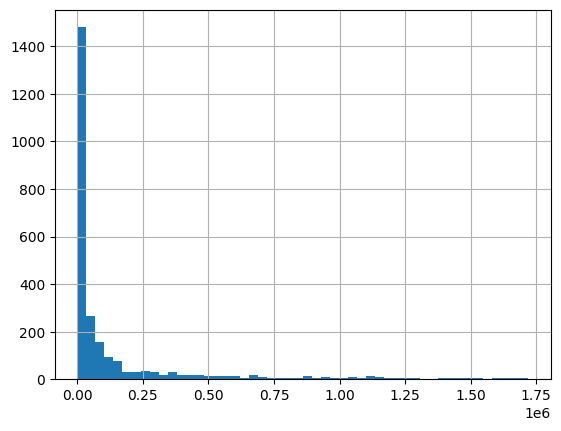

In [33]:
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50)

In [34]:
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)].head(5)

,BENEFICIARIO,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEETS
1,PRAXAIR MEXICO S. DE R.L. DE C.V.,FZ5592100-183011-5005,SFA-057-2022,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1029028.0,2023-12-19,12474.70,GTOS VARIOS
2,"TELEFONOS DE MEXICO,S.A.B DE C.V.",0V03217-011-183011-6490,NO APLICA,SERVICIO TELEFONICO DE LA DELEGACION IMPUESTO ...,TR,1028981.0,2023-12-15,1282.82,GTOS VARIOS
3,"TELEFONOS DE MEXICO,S.A.B DE C.V.",0F03598-11-183011-6491,NO APLICA,SERVICIO TELEFONICO DEL DIF. CANOAS Y SEGURIDA...,TR,1029062.0,2023-12-21,2723.97,GTOS VARIOS
4,"CREACIONES EXCLUSIVAS CARYFAM, S.A. DE C.V.",9866-183011-6441,ORDEN DE COMPRA 10540,COMPRA DE PLAYERAS PARA ARBITROS Y COMITE ORGA...,TR,1029036.0,2023-12-19,203580.00,GTOS VARIOS
5,"ARTE EMBLEMATICO, S.A. DE C.V.",F8636-183011-5932,ORDEN DE COMPRA 10509,RECONOCIMIENTOS COPAS DE LA FUNDACION DE MONTE...,TR,1028914.0,2023-12-14,25056.00,GTOS VARIOS


### Analisis multidimensional de las variables

In [36]:
sum_importe_beneficiarios = compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']

In [38]:
sum_importe_beneficiarios

,IMPORTE
BENEFICIARIO,
"8ENRED, S DE R.L. DE C.V.",638000.00
ABUNDIS ALBERTO,47696.25
"ACOPIADORA COMERCIAL Y AGROINDUSTRIAL, S.A. DE C.V.",823499.96
ADAME FARIAS ADOLFO,1408444.16
"ADMON DE PROY Y SERVICIOS EN CONDOMINIO, SC.",149762.63
...,...
"W40, S.A. DE C.V.",21576.00
"YAPAU CONSULTING, S DE R.L. DE C.V.",500000.00
ZAPATA CHAVIRA HOMERO ARTURO,26730.00


<Axes: xlabel='BENEFICIARIO'>

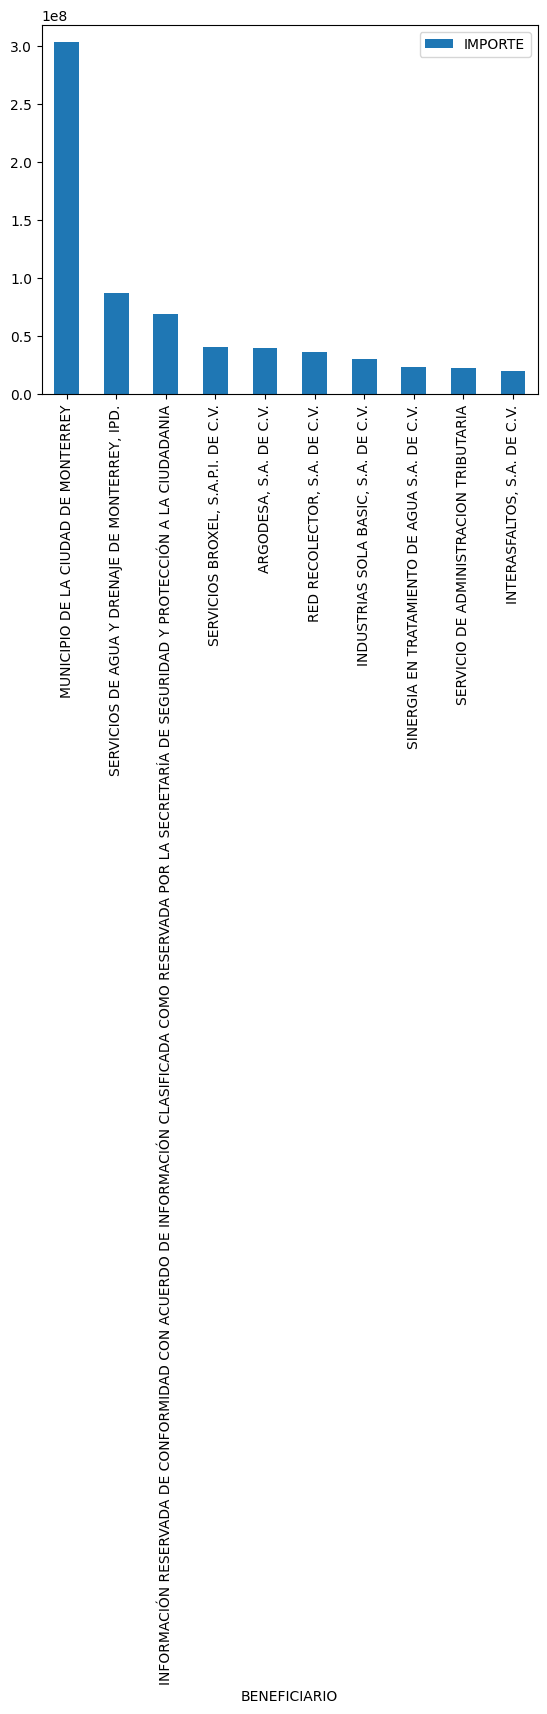

In [41]:
sum_importe_beneficiarios.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO', y='IMPORTE')

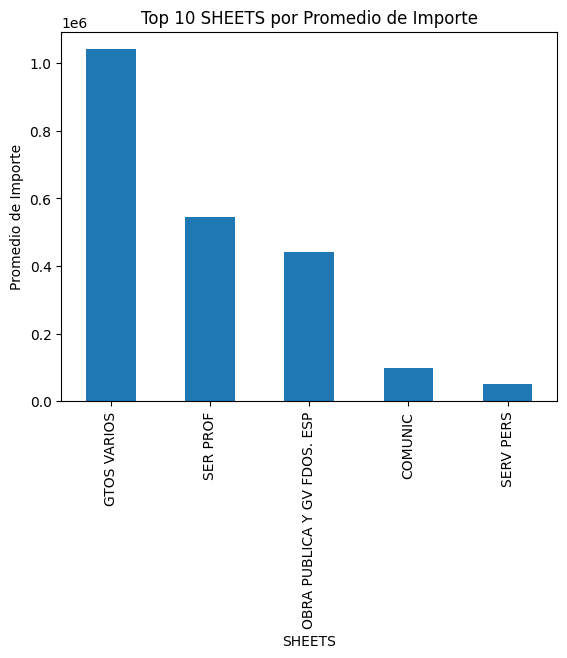

In [46]:
# Calcula la media de 'IMPORTE' por 'SHEETS' y convierte a DataFrame para evitar problemas con el reset_index
mean_importe_sheet = compras_df.groupby('SHEETS', as_index=False)['IMPORTE'].mean()

# Ordena, selecciona las primeras 10 filas, y grafica
top_10_mean_importe_sheet = mean_importe_sheet.sort_values(by='IMPORTE', ascending=False).iloc[0:10]
top_10_mean_importe_sheet.plot(kind='bar', x='SHEETS', y='IMPORTE', legend=False, title='Top 10 SHEETS por Promedio de Importe')
plt.xlabel('SHEETS')
plt.ylabel('Promedio de Importe')
plt.show()


In [47]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]

,index,SHEETS,IMPORTE
1,1,GTOS VARIOS,1.041125e+06
3,3,SER PROF,5.464488e+05
2,2,OBRA PUBLICA Y GV FDOS. ESP,4.422806e+05
0,0,COMUNIC,9.979830e+04
4,4,SERV PERS,5.124681e+04


In [48]:
sum_importe_fecha = compras_df.groupby('FECHA').sum()['IMPORTE']
sum_importe_fecha

,IMPORTE
FECHA,
2023-12-01,8.683556e+07
2023-12-04,1.246003e+07
2023-12-05,7.483946e+06
2023-12-06,3.401564e+04
2023-12-07,7.297144e+06
2023-12-08,7.837115e+07
2023-12-11,4.504922e+07
2023-12-12,6.832214e+04
2023-12-13,3.486621e+06


In [53]:
compras_gastos_df = compras_df[compras_df['SHEETS'] == 'GTOS VARIOS']

<Axes: >

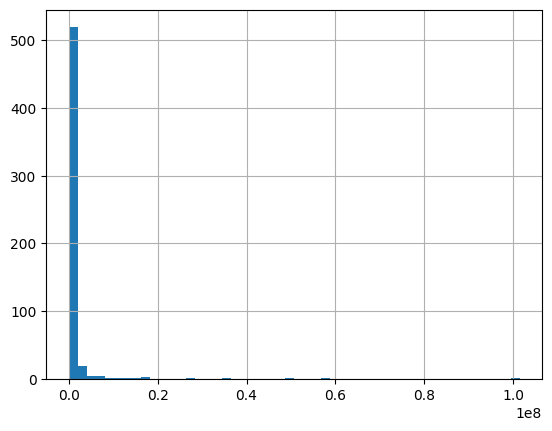

In [54]:
compras_gastos_df['IMPORTE'].hist(bins=50)

In [57]:
compras_df[compras_df['BENEFICIARIO'] == "MUNICIPIO DE LA CIUDAD DE MONTERREY"]['SHEETS'].value_counts()

,count
SHEETS,
GTOS VARIOS,54
OBRA PUBLICA Y GV FDOS. ESP,1


In [60]:
compras_sheet_beneficiario = compras_df.groupby(['BENEFICIARIO', 'SHEETS']).sum()['IMPORTE'].sort_values().unstack('SHEETS')

In [64]:
top_beneficiarios = compras_df.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]

<Axes: xlabel='BENEFICIARIO'>

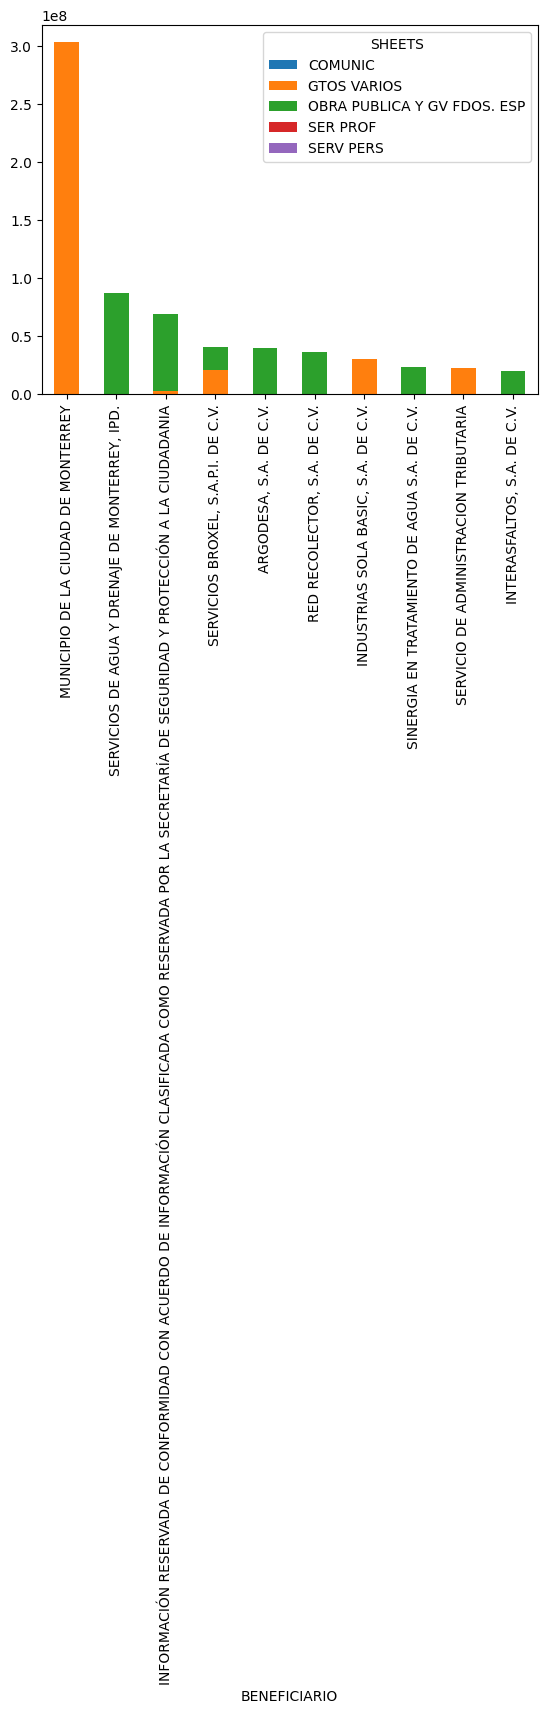

In [66]:
compras_sheet_beneficiario.loc[top_beneficiarios].plot.bar(stacked=True)

In [61]:
compras_sheet_beneficiario.loc[]

SHEETS,COMUNIC,GTOS VARIOS,OBRA PUBLICA Y GV FDOS. ESP,SER PROF,SERV PERS
BENEFICIARIO,,,,,
"8ENRED, S DE R.L. DE C.V.",NaN,NaN,NaN,638000.00,NaN
ABUNDIS ALBERTO,NaN,NaN,NaN,47696.25,NaN
"ACOPIADORA COMERCIAL Y AGROINDUSTRIAL, S.A. DE C.V.",NaN,823499.96,NaN,NaN,NaN
ADAME FARIAS ADOLFO,NaN,1309282.72,99161.44,NaN,NaN
"ADMON DE PROY Y SERVICIOS EN CONDOMINIO, SC.",NaN,NaN,149762.63,NaN,NaN
...,...,...,...,...,...
"W40, S.A. DE C.V.",NaN,NaN,21576.00,NaN,NaN
"YAPAU CONSULTING, S DE R.L. DE C.V.",500000.0,NaN,NaN,NaN,NaN
ZAPATA CHAVIRA HOMERO ARTURO,NaN,NaN,NaN,26730.00,NaN


### Analisis de texto

In [68]:
import nltk
from nltk.corpus import stopwords

# Descarga el recurso de stopwords si no está disponible
nltk.download('stopwords')

# Imprime la lista de palabras de parada en español
print(stopwords.words('spanish'))


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [70]:
textos_compras = ''
for row in compras_df['CONCEPTO']: textos_compras = textos_compras + ' ' + row

In [72]:
stopwords_list = stopwords.words('spanish') + ['2023', 'cont', 'millar', 'dpp', 'est','op', 'ret', 'mty','icom']

In [76]:
textos_compras = ' '.join([x for x in textos_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

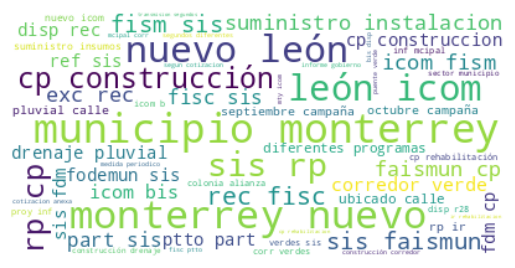

In [77]:
wc = WordCloud(background_color='white')
wc.generate(textos_compras)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()